# **Disease prediction using various algorithms**

In [ ]:
#Importing Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import plotly.express as px
import seaborn as sns
import io
from google.colab import files
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.feature_selection import f_regression, SelectKBest
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn import model_selection
from sklearn.pipeline import make_pipeline

In [ ]:
#Reading the training file
uploaded = files.upload()
disease_training = pd.read_csv(io.BytesIO(uploaded['Training.csv']))
print(disease_training)

Saving Training.csv to Training (6).csv
      itching  skin_rash  nodal_skin_eruptions  continuous_sneezing  \
0           1          1                     1                    0   
1           0          1                     1                    0   
2           1          0                     1                    0   
3           1          1                     0                    0   
4           1          1                     1                    0   
...       ...        ...                   ...                  ...   
4915        0          0                     0                    0   
4916        0          1                     0                    0   
4917        0          0                     0                    0   
4918        0          1                     0                    0   
4919        0          1                     0                    0   

      shivering  chills  joint_pain  stomach_pain  acidity  ulcers_on_tongue  \
0             0       0    

In [ ]:
#Reading the testing file
uploaded1 = files.upload()
disease_testing = pd.read_csv(io.BytesIO(uploaded1['Testing.csv']))
print(disease_testing)

Saving Testing.csv to Testing (6).csv
    itching  skin_rash  nodal_skin_eruptions  continuous_sneezing  shivering  \
0         1          1                     1                    0          0   
1         0          0                     0                    1          1   
2         0          0                     0                    0          0   
3         1          0                     0                    0          0   
4         1          1                     0                    0          0   
5         0          0                     0                    0          0   
6         0          0                     0                    0          0   
7         0          0                     0                    0          0   
8         0          0                     0                    0          0   
9         0          0                     0                    0          0   
10        0          0                     0                    0          0   
11

In [ ]:
#Cleaning the data
disease_training = disease_training.drop("Unnamed: 133",axis=1)
disease_training

,itching,skin_rash,nodal_skin_eruptions,continuous_sneezing,shivering,chills,joint_pain,stomach_pain,acidity,ulcers_on_tongue,...,blackheads,scurring,skin_peeling,silver_like_dusting,small_dents_in_nails,inflammatory_nails,blister,red_sore_around_nose,yellow_crust_ooze,prognosis
0,1,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Fungal infection
1,0,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Fungal infection
2,1,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Fungal infection
3,1,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Fungal infection
4,1,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Fungal infection
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4915,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,(vertigo) Paroymsal Positional Vertigo
4916,0,1,0,0,0,0,0,0,0,0,...,1,1,0,0,0,0,0,0,0,Acne
4917,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Urinary tract infection
4918,0,1,0,0,0,0,1,0,0,0,...,0,0,1,1,1,1,0,0,0,Psoriasis


## Exploratory Data Analysis

In [ ]:
len(disease_training['prognosis'].unique())

41

In [ ]:
len(disease_training) - disease_training.isna().count()

itching                 0
skin_rash               0
nodal_skin_eruptions    0
continuous_sneezing     0
shivering               0
                       ..
inflammatory_nails      0
blister                 0
red_sore_around_nose    0
yellow_crust_ooze       0
prognosis               0
Length: 133, dtype: int64

In [ ]:
print(disease_training["prognosis"].unique())


['Fungal infection' 'Allergy' 'GERD' 'Chronic cholestasis' 'Drug Reaction'
 'Peptic ulcer diseae' 'AIDS' 'Diabetes ' 'Gastroenteritis'
 'Bronchial Asthma' 'Hypertension ' 'Migraine' 'Cervical spondylosis'
 'Paralysis (brain hemorrhage)' 'Jaundice' 'Malaria' 'Chicken pox'
 'Dengue' 'Typhoid' 'hepatitis A' 'Hepatitis B' 'Hepatitis C'
 'Hepatitis D' 'Hepatitis E' 'Alcoholic hepatitis' 'Tuberculosis'
 'Common Cold' 'Pneumonia' 'Dimorphic hemmorhoids(piles)' 'Heart attack'
 'Varicose veins' 'Hypothyroidism' 'Hyperthyroidism' 'Hypoglycemia'
 'Osteoarthristis' 'Arthritis' '(vertigo) Paroymsal  Positional Vertigo'
 'Acne' 'Urinary tract infection' 'Psoriasis' 'Impetigo']


In [ ]:
keys  = disease_training["prognosis"].value_counts().keys()
keys

Index(['Fungal infection', 'Hepatitis C', 'Hepatitis E', 'Alcoholic hepatitis',
       'Tuberculosis', 'Common Cold', 'Pneumonia',
       'Dimorphic hemmorhoids(piles)', 'Heart attack', 'Varicose veins',
       'Hypothyroidism', 'Hyperthyroidism', 'Hypoglycemia', 'Osteoarthristis',
       'Arthritis', '(vertigo) Paroymsal  Positional Vertigo', 'Acne',
       'Urinary tract infection', 'Psoriasis', 'Hepatitis D', 'Hepatitis B',
       'Allergy', 'hepatitis A', 'GERD', 'Chronic cholestasis',
       'Drug Reaction', 'Peptic ulcer diseae', 'AIDS', 'Diabetes ',
       'Gastroenteritis', 'Bronchial Asthma', 'Hypertension ', 'Migraine',
       'Cervical spondylosis', 'Paralysis (brain hemorrhage)', 'Jaundice',
       'Malaria', 'Chicken pox', 'Dengue', 'Typhoid', 'Impetigo'],
      dtype='object')

In [ ]:
values = disease_training["prognosis"].value_counts().values
values

array([120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120,
       120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120,
       120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120,
       120, 120])

<BarContainer object of 41 artists>

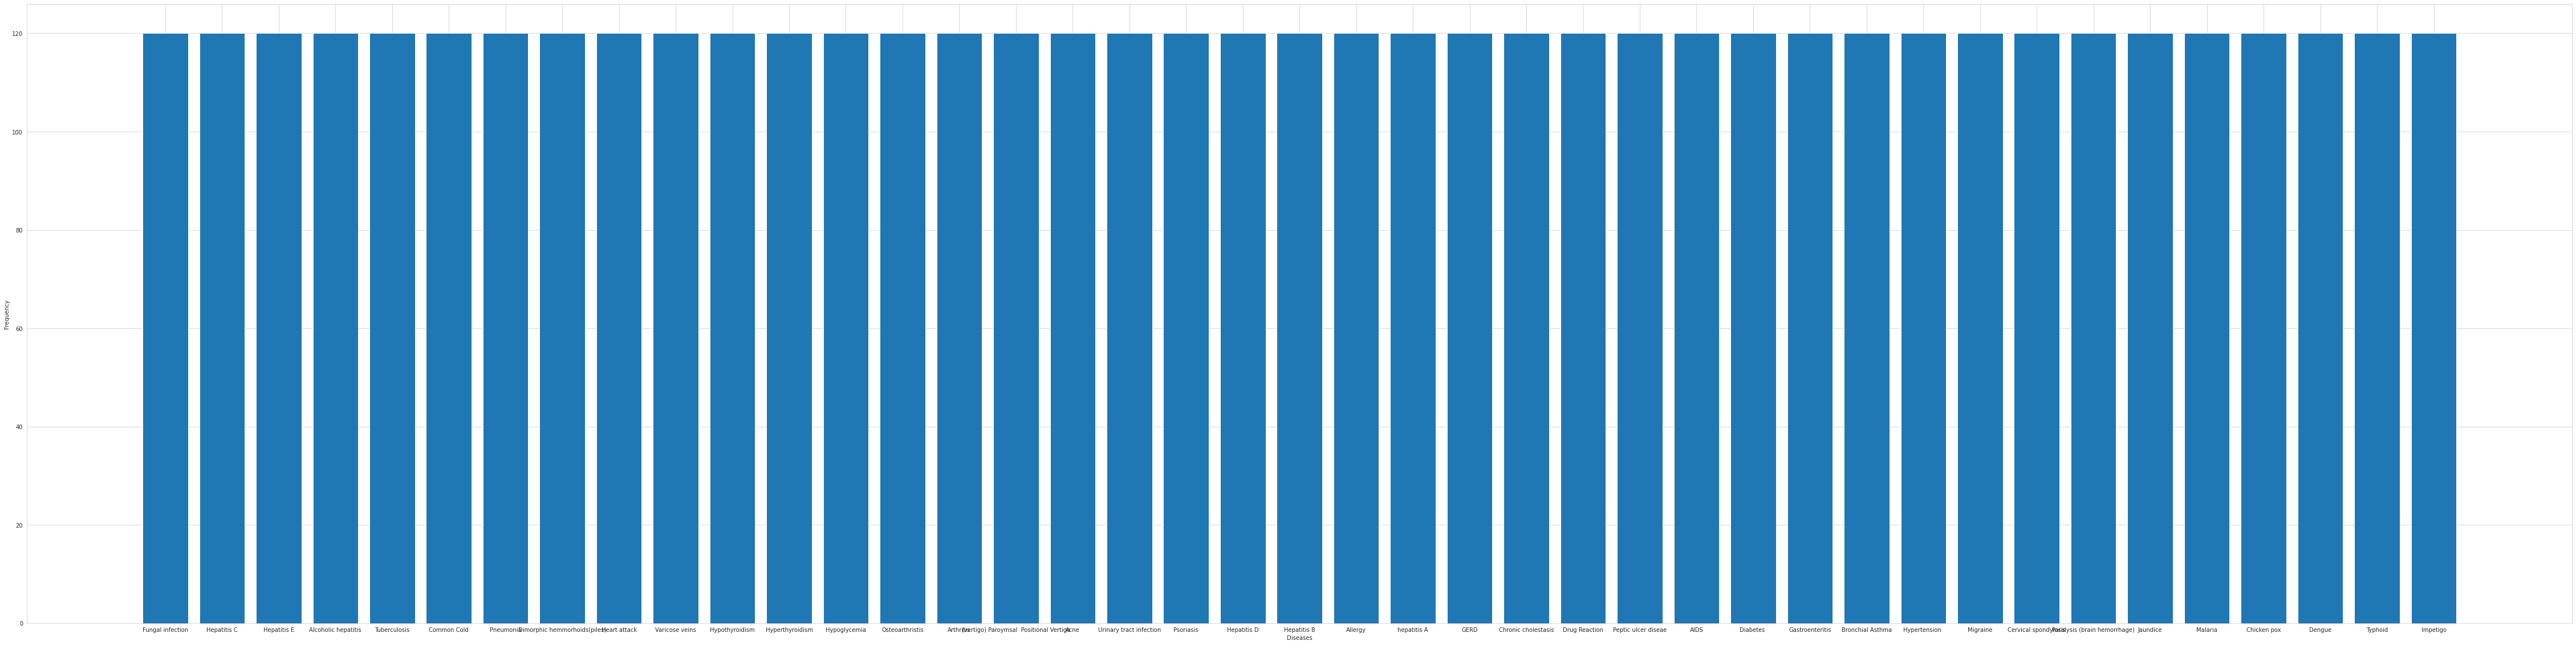

In [ ]:
plt.figure(figsize = (80, 20))
plt.xlabel("Diseases")
plt.ylabel("Frequency")
plt.bar(keys, values)

In [ ]:
def violin(col):
    fig = px.violin(disease_training, y=col, x="class", color="class", box=True, template = 'plotly_dark')
    return fig.show()

def kde(col):
    grid = sns.FacetGrid(disease_training, hue="class", height = 6, aspect=2)
    grid.map(sns.kdeplot, col)
    grid.add_legend()
    
def scatter(col1, col2):
    fig = px.scatter(disease_training, x=col1, y=col2, color="class", template = 'plotly_dark')
    return fig.show()



##Data Preprocessing

In [ ]:
#Encoding categorical to numerical
encoder = LabelEncoder()
disease_training["prognosis"] = encoder.fit_transform(disease_training["prognosis"])
disease_testing["prognosis"] = encoder.fit_transform(disease_testing["prognosis"])

In [ ]:
#Decoding prognosis back
decoded_data = encoder.inverse_transform(disease_testing["prognosis"])
decoded_data



array(['Fungal infection', 'Allergy', 'GERD', 'Chronic cholestasis',
       'Drug Reaction', 'Peptic ulcer diseae', 'AIDS', 'Diabetes ',
       'Gastroenteritis', 'Bronchial Asthma', 'Hypertension ', 'Migraine',
       'Cervical spondylosis', 'Paralysis (brain hemorrhage)', 'Jaundice',
       'Malaria', 'Chicken pox', 'Dengue', 'Typhoid', 'hepatitis A',
       'Hepatitis B', 'Hepatitis C', 'Hepatitis D', 'Hepatitis E',
       'Alcoholic hepatitis', 'Tuberculosis', 'Common Cold', 'Pneumonia',
       'Dimorphic hemmorhoids(piles)', 'Heart attack', 'Varicose veins',
       'Hypothyroidism', 'Hyperthyroidism', 'Hypoglycemia',
       'Osteoarthristis', 'Arthritis',
       '(vertigo) Paroymsal  Positional Vertigo', 'Acne',
       'Urinary tract infection', 'Psoriasis', 'Impetigo',
       'Fungal infection'], dtype=object)

In [ ]:
#Segregating X and Y axis
X_train = disease_training.drop('prognosis',axis=1)
Y_train = disease_training['prognosis']
X_test = disease_testing.drop('prognosis',axis=1)
Y_test = disease_testing['prognosis']

###ANOVA Feature Selection

In [ ]:
#Selecting 75 best features on training dataset
fs = SelectKBest(score_func=f_regression,k=75) 
fit = fs.fit(X_train,Y_train)

In [ ]:
#Selecting 75 best features on testing dataset
fs = SelectKBest(score_func=f_regression,k=75)
fit = fs.fit(X_test,Y_test)

In [ ]:
print(np.round(fit.pvalues_,4))
print(np.round(fit.scores_,3))

[0.2819 0.2938 0.6823 0.1165 0.1783 0.4526 0.1316 0.5573 0.708  0.7449
 0.1078 0.3066 0.4614 0.6217 0.2943 0.6076 0.6676 0.6076 0.5382 0.3705
 0.8214 0.5263 0.1078 0.5079 0.9185 0.768  0.8092 0.5277 0.0822 0.8092
 0.1581 0.8527 0.9235 0.2232 0.6483 0.5439 0.4552 0.1869 0.5382 0.2999
 0.0547 0.2227 0.9412 0.3373 0.8591 1.     0.1519 0.7795 0.9626 0.715
 0.3095 0.4057 0.4057 0.4057 0.4057 0.4057 0.5168 0.2769 0.2703 0.5634
 0.5634 0.5634 0.5634 0.9158 0.8566 0.1033 0.1033 0.499  0.1033 0.1033
 0.6076 0.6076 0.6076 0.6076 0.6169 0.1078 0.6676 0.6676 0.3489 0.3489
 0.5175 0.7751 0.8214 0.2079 0.0898 0.136  0.0898 0.3067 0.4057 0.1233
 0.1233 0.1233 0.268  0.268  0.1461 0.3271 0.2638 0.648  0.3067 0.1987
 0.1461 0.5382 0.6823 0.1783 0.5079 0.5079 0.3525 0.2407 0.2326 0.7937
 0.3944 0.9412 0.9412 0.8591 0.8591 0.1519 0.1519 0.1519 0.1718 0.1033
 0.6676 0.8214 0.1285 0.1285 0.1285 0.5382 0.2006 0.2006 0.2006 0.55
 0.8932 0.55  ]
[1.190e+00 1.132e+00 1.700e-01 2.573e+00 1.877e+00 5.750e-01 2.3

In [ ]:
#Feature selection on training dataset
features_score = pd.DataFrame(fit.scores_)
features_pvalue = pd.DataFrame(np.round(fit.pvalues_,4))
features = pd.DataFrame(X_train.columns)
feature_score = pd.concat([features,features_score,features_pvalue],axis=1)
# Assign the column name
feature_score.columns = ["Input_Features","F_Score","P_Value"]
final_feature = feature_score.nlargest(75,columns="F_Score")
print(" Feature Table")
print("-----------------")
print(final_feature)
print("-----------------")


 Feature Table
-----------------
            Input_Features   F_Score  P_Value
40               diarrhoea  3.918280   0.0547
28                sweating  3.178388   0.0822
84      spinning_movements  3.021861   0.0898
86            unsteadiness  3.021861   0.0898
65                  cramps  2.778901   0.1033
..                     ...       ...      ...
67                 obesity  0.465452   0.4990
23   irregular_sugar_level  0.446425   0.5079
104     increased_appetite  0.446425   0.5079
105               polyuria  0.446425   0.5079
56              chest_pain  0.427927   0.5168

[75 rows x 3 columns]
-----------------


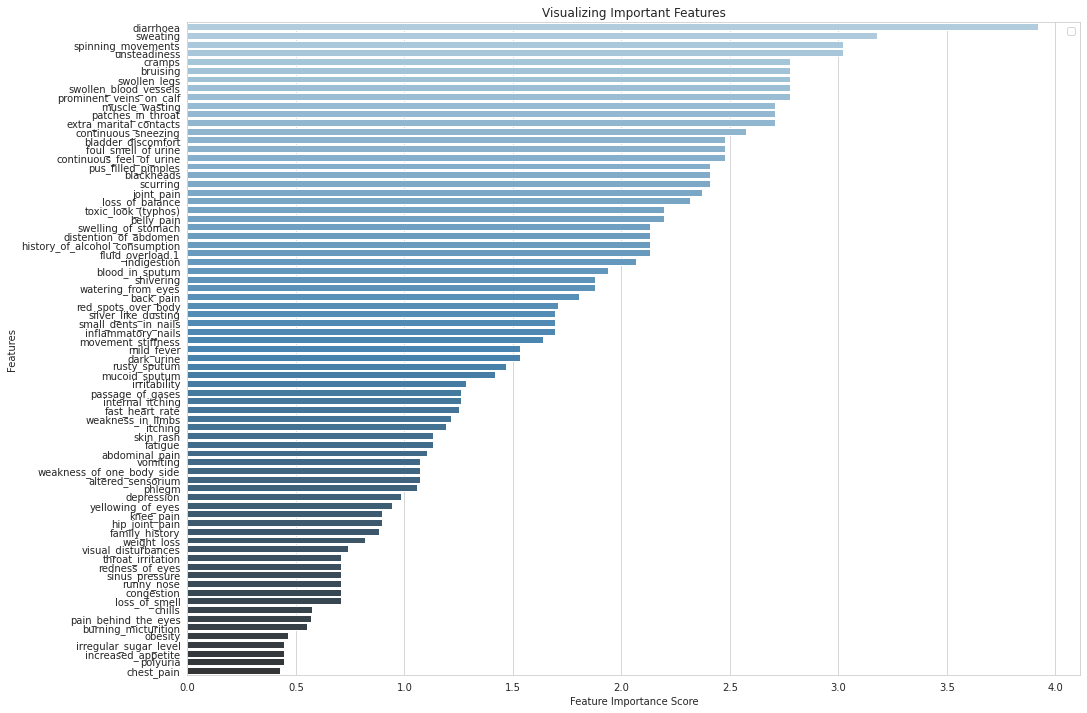

In [ ]:
#Visualizing feature importance 
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

fig = plt.gcf()
fig.set_size_inches(16, 12)

# Creating a bar plot
sns.set_style("whitegrid")
sns.barplot(x=final_feature['F_Score'], y=final_feature['Input_Features'], palette='Blues_d',color='white')

# Add labels to your graph
plt.xlabel('Feature Importance Score')
plt.ylabel('Features')
plt.title("Visualizing Important Features")
plt.legend()
plt.show()

In [ ]:
#Feature selection on testing dataset
features_score = pd.DataFrame(fit.scores_)
features_pvalue = pd.DataFrame(np.round(fit.pvalues_,4))
features = pd.DataFrame(X_test.columns)
feature_score = pd.concat([features,features_score,features_pvalue],axis=1)
# Assign the column name
feature_score.columns = ["Input_Features","F_Score","P_Value"]
final_feature_test = feature_score.nlargest(75,columns="F_Score")
print("Feature table",final_feature)


Feature table             Input_Features   F_Score  P_Value
40               diarrhoea  3.918280   0.0547
28                sweating  3.178388   0.0822
84      spinning_movements  3.021861   0.0898
86            unsteadiness  3.021861   0.0898
65                  cramps  2.778901   0.1033
..                     ...       ...      ...
67                 obesity  0.465452   0.4990
23   irregular_sugar_level  0.446425   0.5079
104     increased_appetite  0.446425   0.5079
105               polyuria  0.446425   0.5079
56              chest_pain  0.427927   0.5168

[75 rows x 3 columns]


In [ ]:
#Drop columns as per feature selection in training dataset 
def drop_columns_not_in_input_features(df1, df2):
  input_features = df2['Input_Features'].tolist()
  for col in df1.columns:
      if col not in input_features:
          df1.drop(col, axis=1, inplace=True)
  return df1

df1 = X_train
df2 = final_feature

updated_df1 = drop_columns_not_in_input_features(df1, df2)
# print(updated_df1)

In [ ]:
updated_X_train = updated_df1
updated_Y_train = disease_training['prognosis']

In [ ]:
#Drop columns as per feature selection in testing dataset 
def drop_columns_not_in_input_features(df1_test, df2_test):
  input_features = df2_test['Input_Features'].tolist()
  for col in df1_test.columns:
      if col not in input_features:
          df1_test.drop(col, axis=1, inplace=True)
  return df1_test

df1_test = X_test
df2_test = final_feature_test

updated_df1_test = drop_columns_not_in_input_features(df1_test, df2_test)
print(updated_df1_test)

    itching  skin_rash  continuous_sneezing  shivering  chills  joint_pain  \
0         1          1                    0          0       0           0   
1         0          0                    1          1       1           0   
2         0          0                    0          0       0           0   
3         1          0                    0          0       0           0   
4         1          1                    0          0       0           0   
5         0          0                    0          0       0           0   
6         0          0                    0          0       0           0   
7         0          0                    0          0       0           0   
8         0          0                    0          0       0           0   
9         0          0                    0          0       0           0   
10        0          0                    0          0       0           0   
11        0          0                    0          0       0  

In [ ]:
updated_X_test = updated_df1_test
updated_Y_test = disease_testing['prognosis']

##Applying SVM Model

In [ ]:
#Linear SVM
svm_model_linear = SVC(kernel='linear')
svm_model_linear.fit(updated_X_train, updated_Y_train)
svm_predicted_linear = svm_model_linear.predict(X_test)
y_pred_svm_linear = svm_model_linear.predict(updated_X_test)
y_pred_svm_linear

#Polynomial SVM
svm_model_poly = SVC(kernel='poly')
svm_model_poly.fit(updated_X_train, updated_Y_train)
svm_predicted_poly = svm_model_poly.predict(X_test)
y_pred_svm_poly = svm_model_poly.predict(updated_X_test)
y_pred_svm_poly

#RBF SVM
svm_model_rbf = SVC(kernel='rbf')
svm_model_rbf.fit(updated_X_train, updated_Y_train)
svm_predicted_rbf = svm_model_rbf.predict(X_test)
y_pred_svm_rbf = svm_model_rbf.predict(updated_X_test)
y_pred_svm_rbf

print("SVM model accuracy(in %):", accuracy_score(updated_Y_test, svm_predicted_linear)*100)
print("SVM model accuracy(in %):", accuracy_score(updated_Y_test, svm_predicted_poly)*100)
print("SVM model accuracy(in %):", accuracy_score(updated_Y_test, svm_predicted_rbf)*100)

linear_acc = accuracy_score(updated_Y_test, svm_predicted_linear)*100
poly_acc = accuracy_score(updated_Y_test, svm_predicted_poly)*100
rbf_acc = accuracy_score(updated_Y_test, svm_predicted_rbf)*100

SVM model accuracy(in %): 95.23809523809523
SVM model accuracy(in %): 97.61904761904762
SVM model accuracy(in %): 95.23809523809523


In [ ]:
from sklearn.metrics import accuracy_score

print(updated_X_train.shape)
print(updated_Y_train.shape)

(4920, 75)
(4920,)


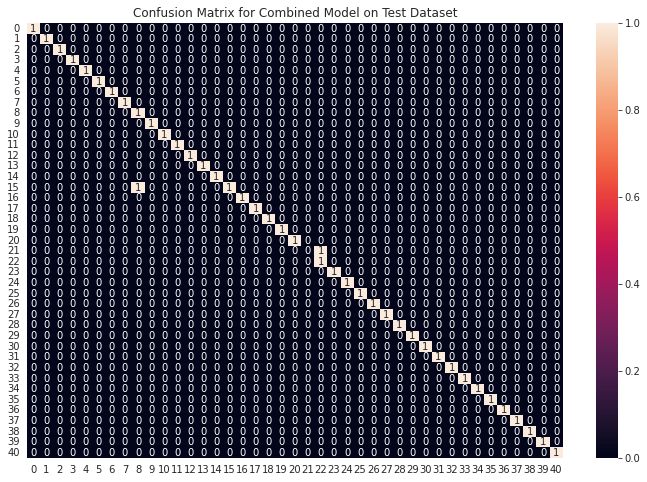

In [ ]:
cf_matrix = confusion_matrix(updated_Y_test, y_pred_svm_rbf)
plt.figure(figsize=(12,8))

sns.heatmap(cf_matrix, annot = True)
plt.title("Confusion Matrix for Combined Model on Test Dataset")
plt.show()

##Applying Random Forest Classifier

In [ ]:
dt = RandomForestClassifier()
dt.fit(updated_X_train, updated_Y_train)
print("Random Forest Classifier score with ",format(dt.score(updated_X_test, updated_Y_test)))

rf_acc = format(dt.score(updated_X_test, updated_Y_test))

Random Forest Classifier score with  0.9523809523809523


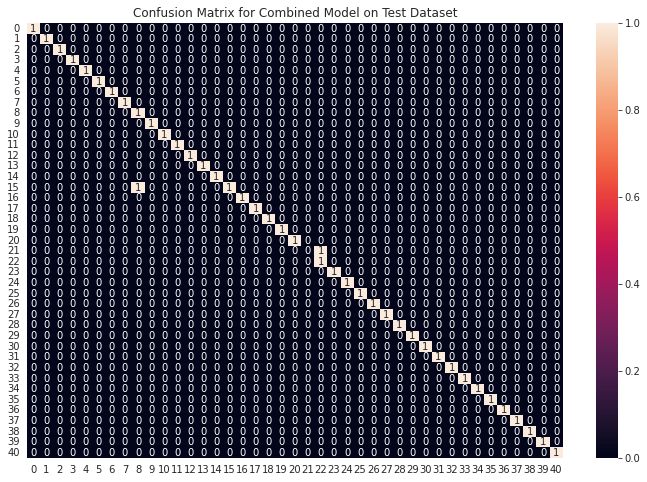

In [ ]:
cf_matrix = confusion_matrix(updated_Y_test, y_pred_dt)
plt.figure(figsize=(12,8))

sns.heatmap(cf_matrix, annot = True)
plt.title("Confusion Matrix for Combined Model on Test Dataset")
plt.show()

In [ ]:
#For Receiver Operating Characteristic (ROC)
from sklearn.metrics import roc_curve ,roc_auc_score, auc

In [ ]:
#Fitting the model

rfc = RandomForestClassifier(criterion='gini',n_estimators=70,bootstrap=True,max_depth=13,max_features='auto', min_samples_leaf=5, min_samples_split=10,random_state=1)
rfc.fit(updated_X_train, updated_Y_train)
# Applying the model to the x_test

pred_rf= rfc.predict(X_test)
pred_rf

/usr/local/lib/python3.9/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


array([15,  4, 16,  9, 14, 33,  1, 12, 17,  6, 23, 30,  7, 32, 28, 29,  8,
       11, 37, 40, 19, 20, 22, 22,  3, 36, 10, 34, 13, 18, 39, 26, 24, 25,
       31,  5,  0,  2, 38, 35, 27,  8])


##Applying Logistic Regression

In [ ]:
lr=LogisticRegression(C=0.2,random_state=0, penalty='l2')
lr.fit(updated_X_train, updated_Y_train)
print("Logistic Train score with ",format(lr.score(updated_X_test, updated_Y_test)))

lr_acc = format(lr.score(updated_X_test, updated_Y_test))

Logistic Train score with  0.9761904761904762


In [ ]:
print("Classification Report")
print(classification_report(updated_Y_test,y_pred_dt))

Classification Report
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         1
           1       1.00      1.00      1.00         1
           2       1.00      1.00      1.00         1
           3       1.00      1.00      1.00         1
           4       1.00      1.00      1.00         1
           5       1.00      1.00      1.00         1
           6       1.00      1.00      1.00         1
           7       1.00      1.00      1.00         1
           8       0.50      1.00      0.67         1
           9       1.00      1.00      1.00         1
          10       1.00      1.00      1.00         1
          11       1.00      1.00      1.00         1
          12       1.00      1.00      1.00         1
          13       1.00      1.00      1.00         1
          14       1.00      1.00      1.00         1
          15       1.00      0.50      0.67         2
          16       1.00      1.00      1.00         1
     

/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
y_pred_dt = dt.predict(updated_X_test)

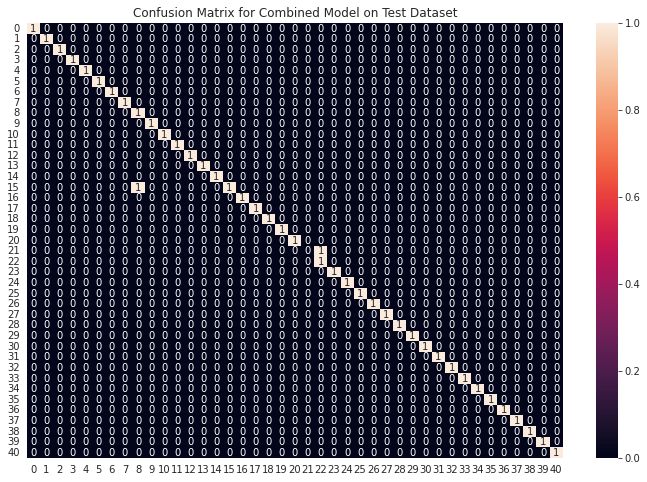

In [ ]:
cf_matrix = confusion_matrix(updated_Y_test, y_pred_dt)
plt.figure(figsize=(12,8))

sns.heatmap(cf_matrix, annot = True)
plt.title("Confusion Matrix for Combined Model on Test Dataset")
plt.show()

#XGBoost Classifier

[15  4 16  9 14 33  1 12 17  6 23 30  7 32 28 29  8 11 37 40 19 20 22 22
  3 36 10 34 13 18 39 26 24 25 31  5  0  2 38 35 27  8]
95.23809523809523
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         1
           1       1.00      1.00      1.00         1
           2       1.00      1.00      1.00         1
           3       1.00      1.00      1.00         1
           4       1.00      1.00      1.00         1
           5       1.00      1.00      1.00         1
           6       1.00      1.00      1.00         1
           7       1.00      1.00      1.00         1
           8       0.50      1.00      0.67         1
           9       1.00      1.00      1.00         1
          10       1.00      1.00      1.00         1
          11       1.00      1.00      1.00         1
          12       1.00      1.00      1.00         1
          13       1.00      1.00      1.00         1
          14       1.00      1.00      1.0

/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


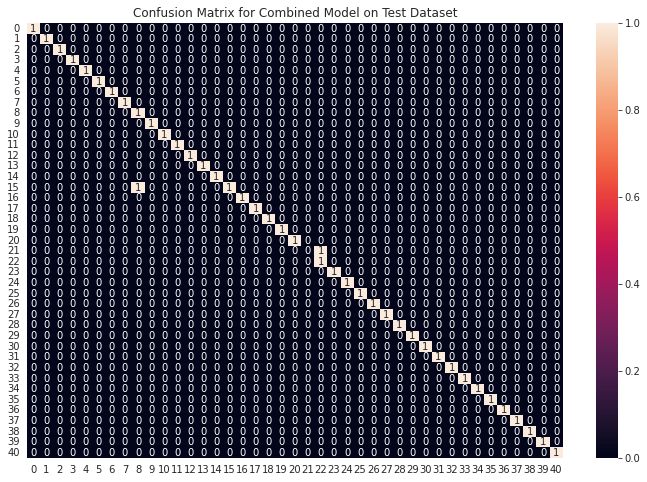

In [ ]:
from sklearn.preprocessing import LabelEncoder
from xgboost import XGBClassifier

xgbclassifier = XGBClassifier()

xgbclassifier.fit(updated_X_train,updated_Y_train)
y_pred_xgb = xgbclassifier.predict(updated_X_test)
print(y_pred_xgb)
print(accuracy_score(updated_Y_test, y_pred_xgb)*100)
print(classification_report(updated_Y_test,y_pred_xgb))

cf_matrix = confusion_matrix(updated_Y_test, y_pred_xgb)
plt.figure(figsize=(12,8))

sns.heatmap(cf_matrix, annot = True)
plt.title("Confusion Matrix for Combined Model on Test Dataset")
plt.show()

xgb_acc = accuracy_score(updated_Y_test, y_pred_xgb)*100

#Applying Naive Bayes

Accuracy on train data by Naive Bayes Classifier: 96.46341463414633
Accuracy on test data by Naive Bayes Classifier: 95.23809523809523


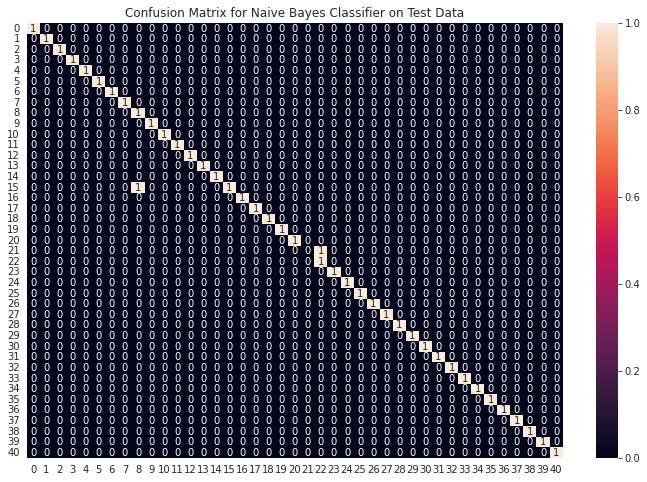

In [ ]:
from sklearn.naive_bayes import GaussianNB

nb_model = GaussianNB()
nb_model.fit(updated_X_train, updated_Y_train)
y_pred1 = nb_model.predict(X_test)
print(f"Accuracy on train data by Naive Bayes Classifier\
: {accuracy_score(updated_Y_train, nb_model.predict(updated_X_train))*100}")

print(f"Accuracy on test data by Naive Bayes Classifier\
: {accuracy_score(updated_Y_test, y_pred1)*100}")
cf_matrix = confusion_matrix(updated_Y_test, y_pred1)

nb_acc = accuracy_score(updated_Y_test, y_pred1)*100

plt.figure(figsize=(12,8))
sns.heatmap(cf_matrix, annot=True)
plt.title("Confusion Matrix for Naive Bayes Classifier on Test Data")
plt.show()

In [ ]:
from sklearn.tree import DecisionTreeClassifier

In [ ]:
dt = DecisionTreeClassifier(max_depth=3)
dt.fit(updated_X_train, updated_Y_train)


DecisionTreeClassifier(max_depth=3)

In [ ]:
tree = DecisionTreeClassifier()
tree.fit(updated_X_train, updated_Y_train)

pred = tree.predict(X_test)
acc = tree.score(X_test, Y_test)

print("Acurray on test set: {:.2f}%".format(acc*100))

Acurray on test set: 95.24%


##Performance Evaluation

LR: 0.964431 (0.011649)
RF: 0.964431 (0.011649)
SVM: 0.964431 (0.011649)
XGB: 0.964431 (0.011649)


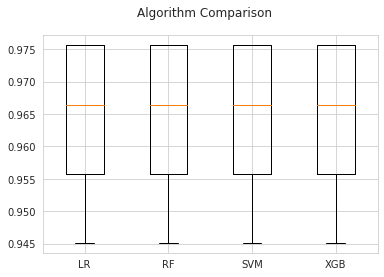

In [ ]:

from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC

models = []
models.append(('LR', LogisticRegression()))
models.append(('RF', RandomForestClassifier()))
models.append(('SVM', SVC()))
models.append(('XGB', XGBClassifier()))
# evaluate each model in turn
results = []
names = []

scoring = 'accuracy'
for name, model in models:
    kfold = model_selection.KFold(n_splits=10)
    pipeline = make_pipeline(StandardScaler(), RandomForestClassifier())
    pipeline.fit(updated_X_train, updated_Y_train)
    cv_results = model_selection.cross_val_score(pipeline, updated_X_train, updated_Y_train, cv=kfold, scoring=scoring)
    results.append(cv_results)
    names.append(name)
    msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
    print(msg)


# boxplot algorithm comparison
fig = plt.figure()
fig.suptitle('Algorithm Comparison')
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names)
plt.show()

In [ ]:
print("FINAL PERFORMANCE REPORT")
print("---------------------------")
print("Logistic Regression : ",format(lr.score(updated_X_test, updated_Y_test)*100))
print("Decision Tree       : ",format(dt.score(updated_X_test, updated_Y_test)*100))
print("XGBoost Classifier  : ",accuracy_score(updated_Y_test, y_pred_xgb)*100)
print("SVM                 : ",accuracy_score(updated_Y_test, svm_predicted_linear)*100)

FINAL PERFORMANCE REPORT
---------------------------
Logistic Regression :  97.61904761904762
Decision Tree       :  9.523809523809524
XGBoost Classifier  :  95.23809523809523
SVM                 :  95.23809523809523
